In [1]:
# Manejo del tiempo para cronometrar el programa y manejar datos tipo fecha
import time
import datetime as dt
import locale

# Manejar datos y cálculos
import pandas as pd

# Crear gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, MultipleLocator, AutoMinorLocator
import seaborn as sns

In [9]:
#Inflación con divisiones COICOP del INDEC
inflation = pd.read_excel(r"sh_ipc_08_23.xls")
inflation

,Índice de precios al consumidor con cobertura nacional. Resultados por región,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,Período de referencia: Diciembre 2016=100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Variaciones mensuales correspondientes a los m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total nacional,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,...,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,"Nota: a partir del mes de junio de 2017, el IN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Eliminamos filas con NaN
inflation = inflation.dropna()
#Eliminamos la primer columna
inflation = inflation.iloc[:,1:]
#Convertimos la primer fila a mm/yyyy
locale.setlocale(locale.LC_TIME, 'es_ES.utf8')
inflation.iloc[0] = pd.to_datetime(inflation.iloc[0]).dt.strftime('%m/%Y')
#Evitamos que el índice se vaya a llamar según la primer columna
inflation = inflation.reset_index(drop=True)
#Primera fila como encabezados
inflation.columns = inflation.iloc[0]
inflation

,01/2017,02/2017,03/2017,04/2017,05/2017,06/2017,07/2017,08/2017,09/2017,10/2017,...,10/2022,11/2022,12/2022,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023
0,01/2017,02/2017,03/2017,04/2017,05/2017,06/2017,07/2017,08/2017,09/2017,10/2017,...,10/2022,11/2022,12/2022,01/2023,02/2023,03/2023,04/2023,05/2023,06/2023,07/2023
1,1.6,2.1,2.4,2.7,1.4,1.2,1.7,1.4,1.9,1.5,...,6.3,4.9,5.1,6,6.6,7.7,8.4,7.8,6,6.3
2,1.3,1.8,2.8,2.2,1.3,0.9,1.1,2.1,1.8,1.5,...,6.2,3.5,4.7,6.8,9.8,9.3,10.1,5.8,4.1,5.8
3,0.9,4.3,1.9,2.4,1.7,0.7,3,1.3,0.7,3,...,5.4,6.3,7.1,7.3,5.2,8.3,3.8,8.4,4.5,9
4,-1,-0.2,3.4,4.5,1.7,0.9,-1.2,-0.6,3.8,2.1,...,6.8,4.5,4,2.3,3.9,9.4,10.8,7.6,4.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.7,0.5,1.3,2.6,2,0.2,0.4,0.8,1,2.1,...,7.4,5.5,3.8,6,4.2,8.1,11.1,7.2,5.7,6.9
129,1.8,1.7,1.7,1.7,2,1.3,1.4,1.7,1.4,1.2,...,6.5,4.4,4.3,5.5,6.7,6.6,8.3,7.2,6.5,7.8
130,6.2,2.5,4.1,2.7,0.5,0.9,2.7,2.3,1.1,2.7,...,6.5,6.3,6,7.3,3.6,7.5,4.9,7.4,8.8,8.5
131,1.3,1.5,1.5,1.7,1.7,0.9,1.2,1.6,1.1,1.5,...,6.5,4.8,4.5,5.4,6,7.1,8.8,7.2,6.2,7.7


In [11]:
#Nos quedamos sólo con el Total General (segunda fila) y borramos la primer columna
inflation = inflation.iloc[1:2,:].reset_index(drop=True)
inflation = inflation.T
inflation.columns = ["Inflación"]
inflation = inflation.rename_axis("Fecha")
inflation

,Inflación
Fecha,
01/2017,1.6
02/2017,2.1
03/2017,2.4
04/2017,2.7
05/2017,1.4
...,...
03/2023,7.7
04/2023,8.4
05/2023,7.8


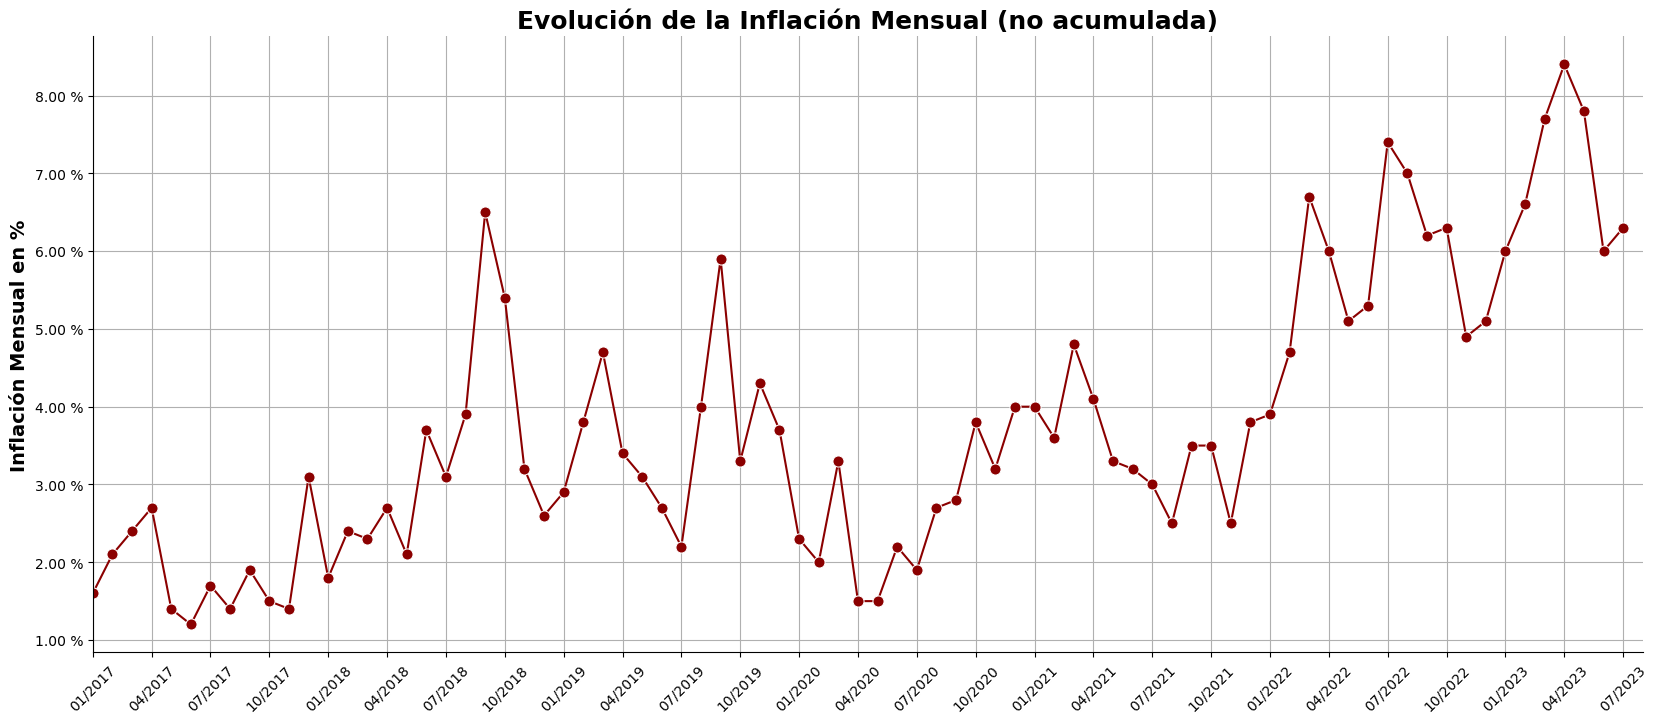

In [12]:
#Gráfico inflación mensual NO ACUMULADA
cantidad_filas = inflation.shape[0]

plt.figure(figsize=(20, 8))
sns.lineplot(
    x="Fecha",
    y="Inflación",
    data=inflation,
    color="darkred",
    marker='o',
    markersize=8,
    label="Inflación Mensual",
    legend=False,
)

# Configurar los ticks del eje X para mostrar cada 3 meses
plt.xticks(range(0, cantidad_filas, 3), rotation=45)
plt.xlim(0, cantidad_filas - 1)


plt.title("Evolución de la Inflación Mensual (no acumulada)",
         fontweight="bold",
         fontsize=18)
plt.ylabel("Inflación Mensual en %",
          fontweight="bold",
          fontsize=14)
plt.xlabel("")

#gca = Get Current Axis
plt.gca().yaxis.set_major_formatter(FuncFormatter("{:,.2f} %".format))

plt.xlim(0, cantidad_filas)


plt.grid(True)
sns.despine()
plt.show()

In [13]:
#A la columna inflación la dividimos por 100 para que sea %, le sumamos 1 para poder multiplicar
#Le aplicamos cumprod (multiplica acumuladamente) y le restamos el uno que sumamos para cada fila
#Lo multiplicamos por 100 para que coincida con el formato de antes
inflation["Inflación Agregada"] = ((inflation["Inflación"]/100+1).cumprod()-1)*100
inflation

,Inflación,Inflación Agregada
Fecha,,
01/2017,1.6,1.6
02/2017,2.1,3.7336
03/2017,2.4,6.223206
04/2017,2.7,9.091233
05/2017,1.4,10.61851
...,...,...
03/2023,7.7,1279.330388
04/2023,8.4,1395.19414
05/2023,7.8,1511.819283


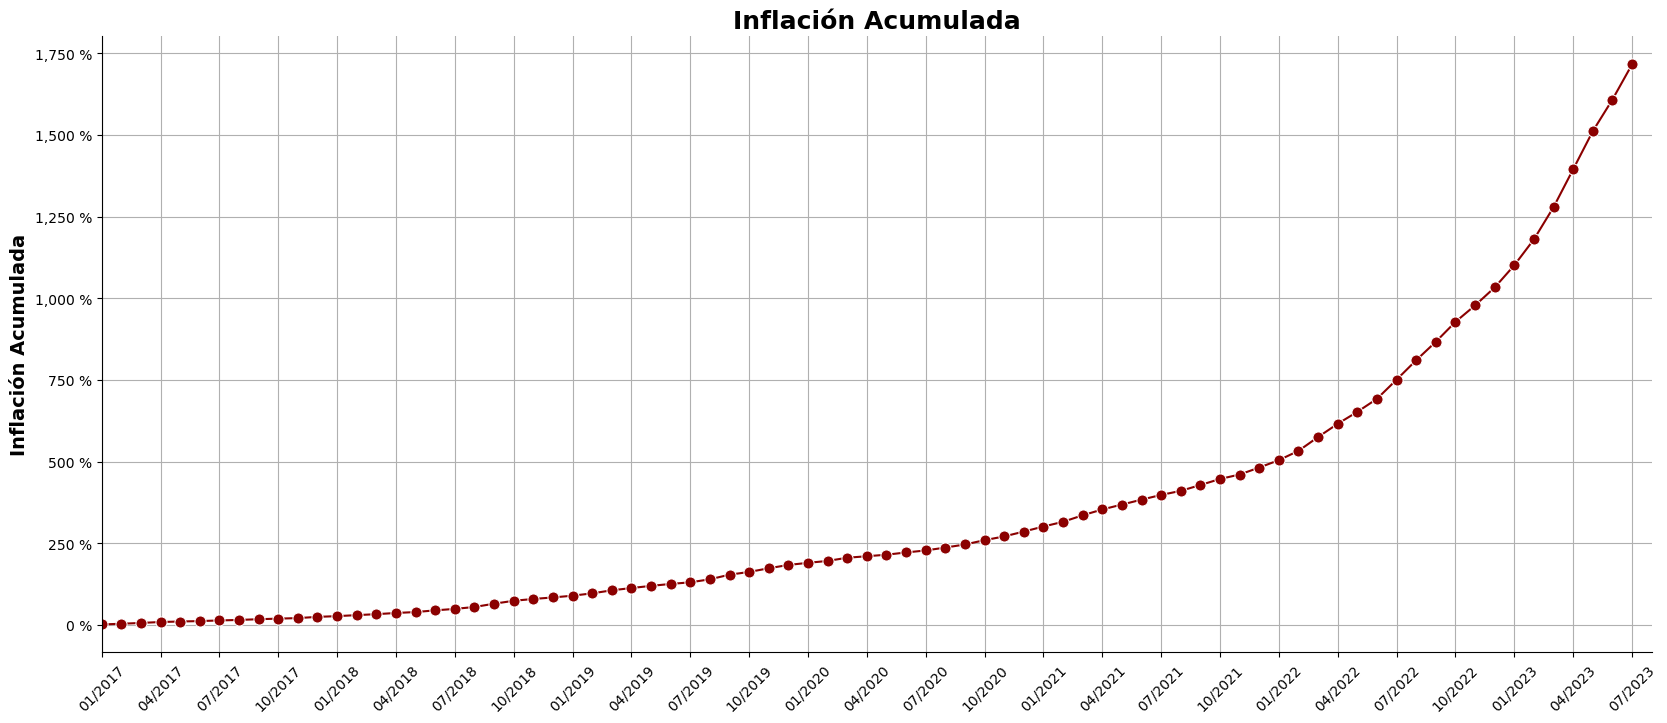

In [17]:
#Gráfico inflación mensual ACUMULADA
cantidad_filas = inflation.shape[0]

plt.figure(figsize=(20, 8))
sns.lineplot(
    x="Fecha",
    y="Inflación Agregada",
    data=inflation,
    color="darkred",
    marker='o',
    markersize=8,
    label="Inflación Agregada",
    legend=False
)

# Configurar los ticks del eje X para mostrar cada 3 meses
plt.xticks(range(0, cantidad_filas, 3), rotation=45)
plt.xlim(0, cantidad_filas - 1)


plt.title("Inflación Acumulada",
         fontweight="bold",
         fontsize=18)
plt.ylabel("Inflación Acumulada",
          fontweight="bold",
          fontsize=14)

plt.gca().yaxis.set_major_formatter(FuncFormatter("{:,.0f} %".format))


plt.xlim(0, cantidad_filas)
plt.xlabel("")

plt.grid(True)
sns.despine()
plt.show()